# Scrapping Data of Movies from [moviesjoy website](https://moviesjoy.is/) :

#### URL : https://moviesjoy.is/top-imdb or https://moviesjoy.is/movie

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display, HTML

In [2]:
table_content = []
page_numbers = 1

for page_nbr in range(1, page_numbers+1) :
    # url = f"https://moviesjoy.is/movie?page={page_nbr}"
    url = f"https://moviesjoy.is/top-imdb?type=all&page={page_nbr}"

    response = requests.get(url)

    # Parsing the webpage content
    soup = BeautifulSoup(response.content, 'html.parser')

    # table = soup.find('div', {'class': 'film_list-wrap'})
    all_movies = soup.find_all('div', {'class': 'flw-item'})
    # print(all_movies)
    print(len(all_movies))
    
    for movie in all_movies :
        
        duration = movie.find('span', {'class': 'fdi-duration'})
        if duration :
            duration = duration.text.strip()
        
        table_content.append({
            'film-quality': movie.find('div', {'class': 'film-poster-quality'}).text.strip(),
            'film-poster': movie.find('img', {'class': 'film-poster-img'}).attrs['data-src'],
            'film-link': f"https://moviesjoy.is{movie.find('a', {'class': 'film-poster-ahref'}).attrs['href']}",
            'film-name':  movie.find('h2', {'class': 'film-name'}).text.strip(),
            'film-type': movie.find('span', {'class': 'fdi-type'}).text.strip(),
            'film-duration': duration,
            'publish-year': movie.find('span', {'class': 'fdi-item'}).text.strip(),
        })
        
        

32


In [3]:
data = pd.DataFrame(table_content)

In [4]:
data.head(10)

,film-quality,film-poster,film-link,film-name,film-type,film-duration,publish-year
0,HD,https://img.moviesjoy.is/resize/188x288/c6/7d/...,https://moviesjoy.is/tv/bluey-63355,Bluey,TV,None,SS 3
1,HD,https://img.moviesjoy.is/resize/188x288/f2/c0/...,https://moviesjoy.is/tv/hope-on-the-street-107554,Hope on the Street,TV,None,SS 1
2,HD,https://img.moviesjoy.is/resize/188x288/55/1a/...,https://moviesjoy.is/movie/jimmie-stevie-ray-v...,Jimmie & Stevie Ray Vaughan: Brothers in Blues,Movie,107m,2023
3,HD,https://img.moviesjoy.is/resize/188x288/04/60/...,https://moviesjoy.is/tv/chasing-the-sun-111280,Chasing the Sun,TV,None,SS 2
4,HD,https://img.moviesjoy.is/resize/188x288/f7/01/...,https://moviesjoy.is/tv/the-last-drive-in-with...,The Last Drive-in With Joe Bob Briggs,TV,None,SS 3
5,HD,https://img.moviesjoy.is/resize/188x288/5a/4e/...,https://moviesjoy.is/tv/planet-earth-ii-38958,Planet Earth II,TV,None,SS 1
6,HD,https://img.moviesjoy.is/resize/188x288/f7/4f/...,https://moviesjoy.is/tv/the-tragically-hip-no-...,The Tragically Hip: No Dress Rehearsal,TV,None,SS 1
7,HD,https://img.moviesjoy.is/resize/188x288/7a/78/...,https://moviesjoy.is/tv/breaking-bad-39506,Breaking Bad,TV,None,SS 5
8,HD,https://img.moviesjoy.is/resize/188x288/42/bd/...,https://moviesjoy.is/tv/planet-earth-38933,Planet Earth,TV,None,SS 1
9,HD,https://img.moviesjoy.is/resize/188x288/2f/0c/...,https://moviesjoy.is/tv/trading-up-with-mandy-...,Trading Up with Mandy Rennehan,TV,None,SS 1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   film-quality   32 non-null     object
 1   film-poster    32 non-null     object
 2   film-link      32 non-null     object
 3   film-name      32 non-null     object
 4   film-type      32 non-null     object
 5   film-duration  4 non-null      object
 6   publish-year   32 non-null     object
dtypes: object(7)
memory usage: 1.9+ KB


In [6]:
data.nunique()

film-quality      1
film-poster      32
film-link        32
film-name        32
film-type         2
film-duration     4
publish-year      8
dtype: int64

<Axes: >

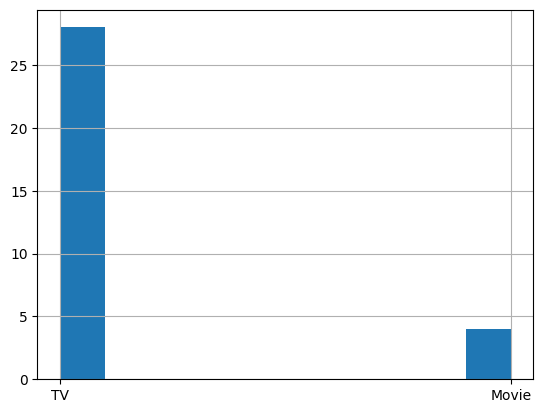

In [7]:
data['film-type'].hist()

In [8]:
data.isna().sum()

film-quality      0
film-poster       0
film-link         0
film-name         0
film-type         0
film-duration    28
publish-year      0
dtype: int64

In [9]:
data['film-poster'][0]

'https://img.moviesjoy.is/resize/188x288/c6/7d/c67d86ebbe68f9adbac3e564416f5e29/c67d86ebbe68f9adbac3e564416f5e29.jpg'

<img src='https://img.moviesjoy.is/resize/188x288/c6/7d/c67d86ebbe68f9adbac3e564416f5e29/c67d86ebbe68f9adbac3e564416f5e29.jpg'>

In [10]:
data.to_csv('moviesjoy_movies_data.csv')